In [1]:
#from io import BytesIO
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

CBcolors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

In [2]:
inPath = os.getcwd().split("\\SVSModelBuildDeploy\\")[0]+"\\SVSModelBuildDeploy\\TestComponents\\TestSets\\WS2"
outPath = os.getcwd().split("\\SVSModelBuildDeploy\\")[0]+"\\SVSModelBuildDeploy\\TestGraphs\\Outputs\\"

In [3]:
Configs = pd.read_pickle(inPath+"\\FieldConfigs.pkl")

In [4]:
observed_data = pd.read_csv(inPath + "\\observed.csv",index_col=0)
observed_data.sort_index(axis=0,inplace=True)
observed_data.index=pd.to_datetime(observed_data.index,format="%d/%m/%Y %H:%M")

In [5]:
testFiles = []
tests = []
for file in os.listdir(inPath+"\\Outputs"):
    if file.endswith('.csv'):
        testFiles.append(file)
        tests.append(file.replace(".csv",""))

In [6]:
Alltests =[]
for t in testFiles[:]:  
    testframe = pd.read_csv(inPath+"\\Outputs\\"+t,index_col=0,dayfirst=True,date_format='%d/%m/%Y %H:%M:%S %p')  
    Alltests.append(testframe)   

AllData = pd.concat(Alltests,axis=1,keys=tests)
AllData.sort_index(axis=0,inplace=True)
AllData.index = pd.to_datetime(AllData.index)

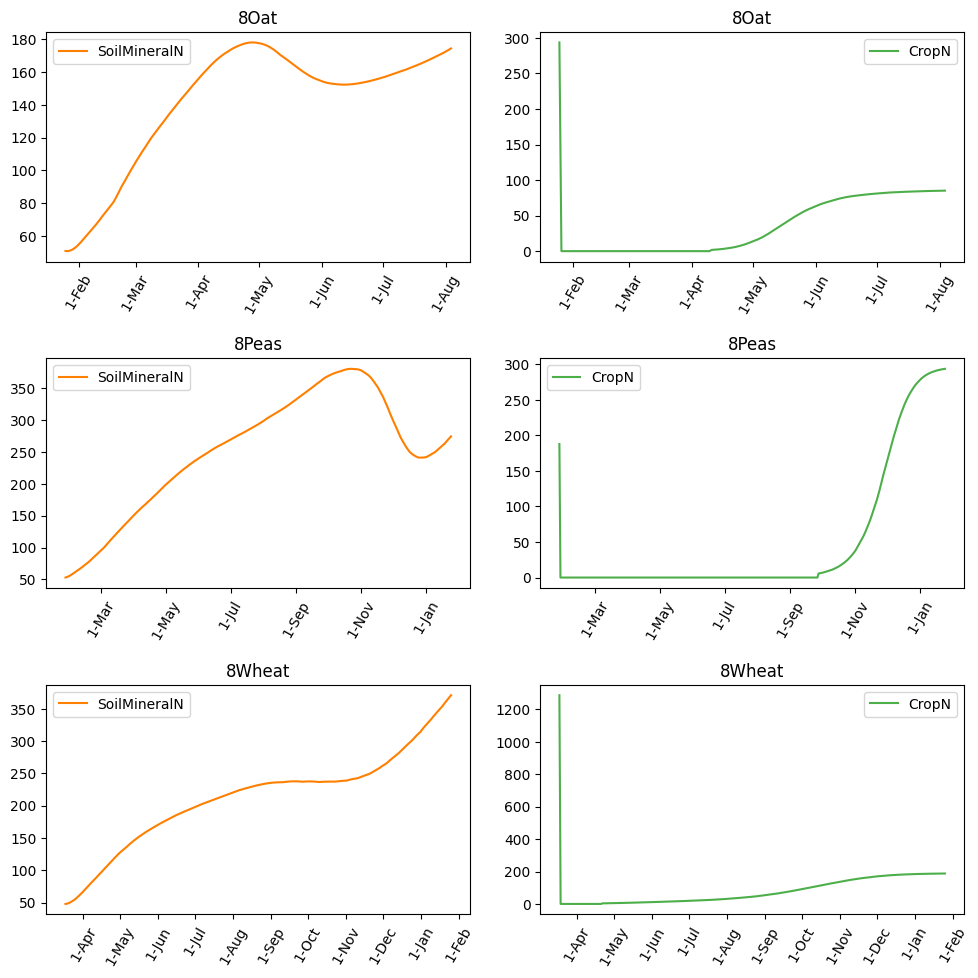

In [7]:
colors = ['orange','green']
Graph = plt.figure(figsize=(10,10))
pos = 1
row_num=len(tests)

for t in tests:
    dates = AllData.loc[Configs.loc["PriorHarvestDate",t]:Configs.loc["CurrentHarvestDate",t],(t,'CropN')].index
    c = 0    
    for v in ['SoilMineralN','CropN']:
        ax = Graph.add_subplot(row_num,2,pos)
        Data = AllData.loc[dates,(t,v)]
        plt.plot(Data,color=CBcolors[colors[c]],label=v)
        #make_observed(observed_data[datefilter])
        plt.title(t)
        plt.xticks(rotation=60)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
        plt.legend()
        Graph.tight_layout(pad=1.5)
        pos+=1
        c+=1

plt.savefig(outPath+'\\TimeCourse.png')

In [8]:
# colors = ['orange','green']
# Graph = plt.figure(figsize=(10,10))
# pos = 1
# row_num=len(test_names)

# for t in test_names:
#     dates = AllData.loc[Configs.loc["PriorHarvestDate",t]:Configs.loc["CurrentHarvestDate",t],(t,'CropN')].index
#     c = 0    
#     for v in ['ResidueN','SoilOMN']:
#         color = 'b'
#         ax = Graph.add_subplot(row_num,2,pos)
#         Data = AllData.loc[dates,(t,v)].cumsum()
#         plt.plot(Data,color=CBcolors[colors[c]],label=v)
#         plt.title(t)
#         plt.xticks(rotation=60)
#         ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
#         plt.legend()
#         Graph.tight_layout(pad=1.5)
#         pos+=1
#         c+=1

In [9]:
# colors = ['orange','green']
# Graph = plt.figure(figsize=(10,10))
# pos = 1
# row_num=len(test_names)

# for t in test_names:
#     dates = AllData.loc[Configs.loc["PriorHarvestDate",t]:Configs.loc["CurrentHarvestDate",t],(t,'CropN')].index
#     c = 0    
#     for v in ['Drainage', 'Irrigation']:
#         color = 'b'
#         ax = Graph.add_subplot(row_num,2,pos)
#         Data = AllData.loc[dates,(t,v)].cumsum()
#         plt.plot(Data,color=CBcolors[colors[c]],label=v)
#         plt.title(t)
#         plt.xticks(rotation=60)
#         ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
#         plt.legend()
#         Graph.tight_layout(pad=1.5)
#         pos+=1
#         c+=1

In [10]:
# colors = ['orange','green']
# Graph = plt.figure(figsize=(10,10))
# pos = 1
# row_num=len(test_names)

# for t in test_names:
#     dates = AllData.loc[Configs.loc["PriorHarvestDate",t]:Configs.loc["CurrentHarvestDate",t],(t,'CropN')].index
#     c = 0    
#     for v in ['Green cover', 'RSWC']:
#         color = 'b'
#         ax = Graph.add_subplot(row_num,2,pos)
#         Data = AllData.loc[dates,(t,v)]
#         plt.plot(Data,color=CBcolors[colors[c]],label=v)
#         plt.title(t)
#         plt.xticks(rotation=60)
#         ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
#         plt.legend()
#         Graph.tight_layout(pad=1.5)
#         pos+=1
#         c+=1